# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.753372e+01     1.274797e+01
 * time: 0.0017881393432617188
     1     3.473678e+01     9.209966e+00
 * time: 0.006597995758056641
     2     2.506364e+01     2.834928e+00
 * time: 0.012812137603759766
     3     2.180819e+01     3.015793e+00
 * time: 0.01817607879638672
     4     2.084607e+01     1.988965e+00
 * time: 0.023597002029418945
     5     1.998879e+01     2.036184e+00
 * time: 0.028068065643310547
     6     1.952641e+01     1.767342e+00
 * time: 0.032691001892089844
     7     1.902813e+01     1.440680e+00
 * time: 0.03722405433654785
     8     1.857160e+01     1.769011e+00
 * time: 0.041795969009399414
     9     1.820844e+01     1.103241e+00
 * time: 0.0463871955871582
    10     1.796825e+01     1.201140e+00
 * time: 0.05086207389831543
    11     1.778266e+01     7.613587e-01
 * time: 0.05532717704772949
    12     1.765405e+01     8.944251e-01
 * time: 0.059893131256103516
    13     1.756658e+01     5.094635e-01


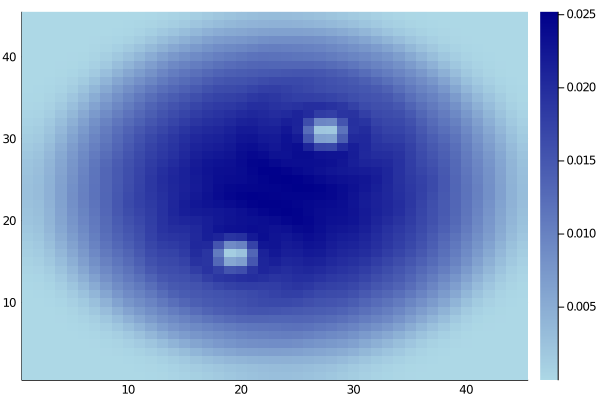

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)